# Visualizing simulation outputs
run name: opt

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from palettable.colorbrewer.sequential import Purples_9
from palettable.colorbrewer.sequential import YlGn_9
from palettable.colorbrewer.diverging import PuOr_8
from palettable.cartocolors.sequential import Emrld_7
from palettable.cmocean.sequential import Tempo_10

from ideotype.data_process import read_data, agg_sims

In [10]:
# read in data
yamlfile = '/home/disk/eos8/ach315/ideotype/ideotype/data/files/filepaths.yml'
df_sims, df_sites, df_wea, df_params, df_all, df_matured = read_data(yamlfile)

In [35]:
# aggregate data
df = df_all
groups = ['cvar', 'site']
mx_mean = agg_sims(df, groups, 'mean')
mx_variance = agg_sims(df, groups, 'variance')
mx_disp = np.divide(mx_variance, mx_mean)

#### Yield mean & variance for all cultivars and sites:

<AxesSubplot:>

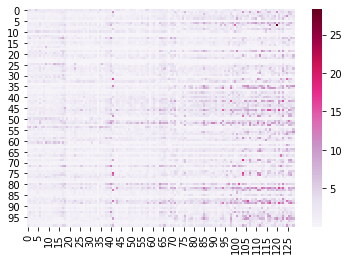

In [39]:
sns.heatmap(mx_disp, cmap='PuRd')

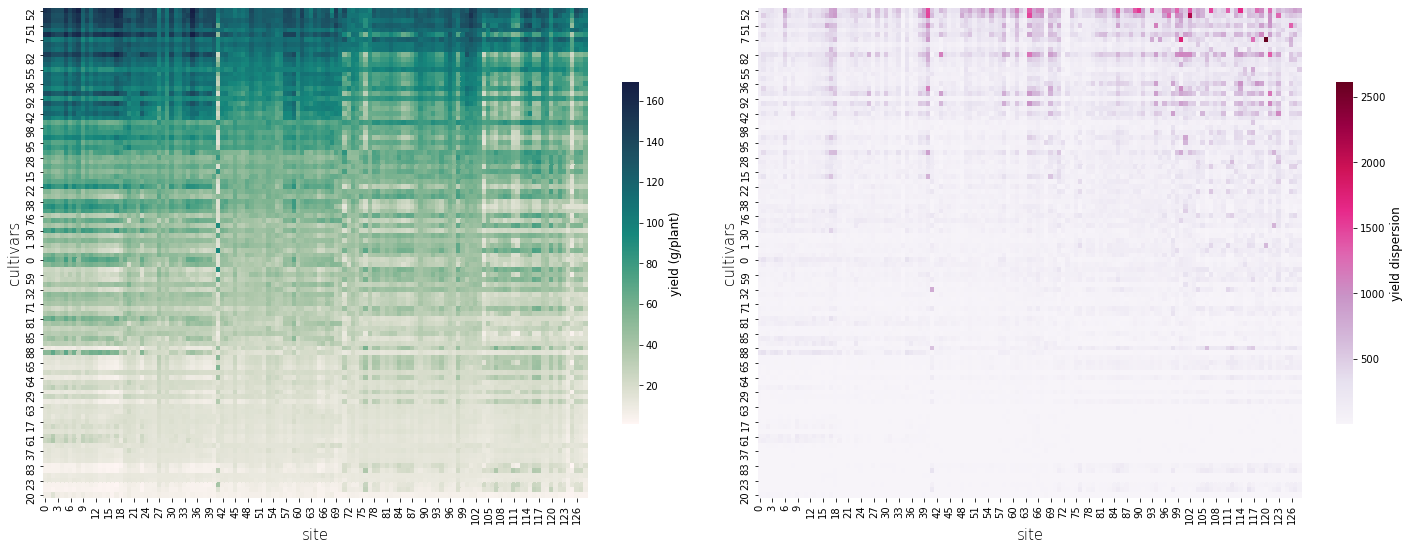

In [31]:
mx_disp = np.divide(mx_variance, mx_mean)
df_yield_means = pd.DataFrame(mx_mean)
df_yield_vars = pd.DataFrame(mx_disp)
df_yield_means['mean'] = df_yield_means.mean(axis=1)
index_sortbymean = df_yield_means.sort_values(by=['mean'], axis=0, ascending=False).index
df_yield_means = df_yield_means.iloc[:,:-1]  # drop last column of calculated before plotting

dfs = [df_yield_means, df_yield_vars]

dfs = [df_ymean, df_yvar]
cmaps = [Tempo_10.mpl_colormap, 'PuRd']
vmaxs = [170, 20]
labels = ['yield (g/plant)', 'yield dispersion']

fig = plt.figure(figsize=(25,9))
for index, df, cmap, label in zip([1,2], dfs, cmaps, labels):
    ax = fig.add_subplot(1,2,index)
    sns.heatmap(df.reindex(index_sortbymean), cmap=cmap, 
                cbar_kws={'shrink': 0.7}, vmax=vmax)
    ax.set_xlabel('site', size=15, fontweight='light')
    ax.set_ylabel('cultivars', size=15, fontweight='light')
    ax.figure.axes[-1].set_ylabel(label, size=12)

fig.subplots_adjust(wspace=0.05)
#plt.savefig('/home/disk/eos8/ach315/upscale/figs/heatmap_mean_var.png', format='png', dpi=800)

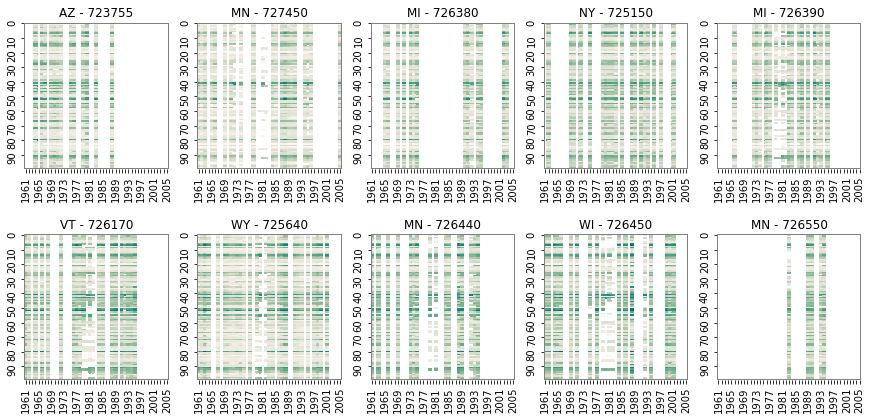

In [59]:
# setup
years = np.arange(1961, 2006)
start_year = 1961
cultivars = np.arange(100)
sites = ["723755", "727450", "726380","725150", "726390", 
         "726170", "725640", "726440", "726450", "726550"]

#sites = df_sites.site[:10]


# dataframe
df = df_all.groupby(['site', 'cvar', 'year']).mean()

# customize xtick labels
array_xticks = ['']*45
index_array = np.arange(0,45,4)
array_years = np.arange(1961,2006,4)
for index_a, index_y in zip(index_array, range(len(array_years))):
    array_xticks[index_a] = array_years[index_y]

# visualize
fig = plt.figure(figsize=(15,100))

for index, site in zip(range(len(sites)), sites):
    # initiate empty matrix and fill will nans
    mx = np.empty(shape=(len(cultivars), len(years)))
    mx[:] = np.nan

    # fetch cultivars with valid yield outputs
    cvars = list(set(df.loc[(site,)].index.get_level_values('cvar')))
    for cvar in cvars:
        ear_years = np.empty(len(years))
        ear_years[:] = np.nan
        ears = df.loc[(site, cvar)].dm_ear
        index_years = df.loc[(site, cvar)].dm_ear.index - start_year
        ear_years[index_years] = ears
        mx[cvar] = ear_years
    
    ax = fig.add_subplot(26,5,index+1)
    hm = sns.heatmap(mx, cmap=Tempo_10.mpl_colormap, 
                     vmin=0, vmax=250, cbar=False,
                     xticklabels=array_xticks,
                     yticklabels=10)
    hm.axhline(y = 0, color='grey',linewidth=2)
    hm.axhline(y = mx.shape[0], color='grey', linewidth=2)
    hm.axvline(x = 0, color='grey', linewidth=2)
    hm.axvline(x = mx.shape[1], color='grey', linewidth=2)
    hm.set_title(f'{str(df_sites[df_sites.site==site].state.values[0])} - {site}')

fig.subplots_adjust(wspace=0.2, hspace=0.45)

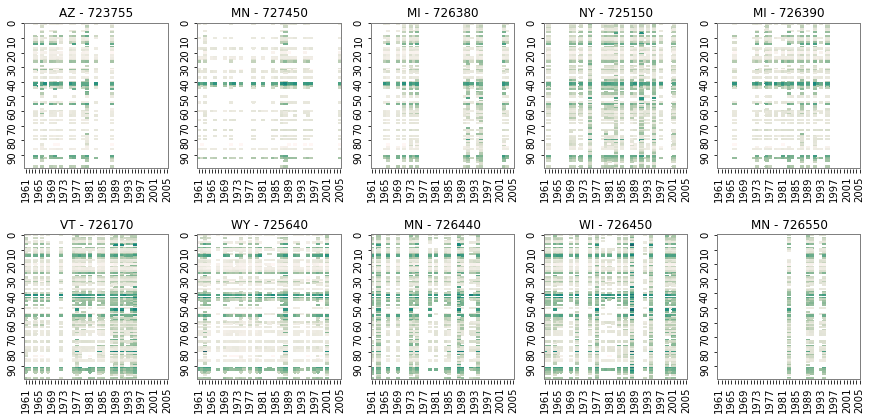

In [57]:
# TODO: weird that this code block didn't throw any errors
# setup
years = np.arange(1961, 2006)
start_year = 1961
cultivars = np.arange(100)
sites = ["723755", "727450", "726380","725150", "726390", 
         "726170", "725640", "726440", "726450", "726550"]

#sites = df_sites.site[:10]


# dataframe
df = df_matured.groupby(['site', 'cvar', 'year']).mean()

# customize xtick labels
array_xticks = ['']*45
index_array = np.arange(0,45,4)
array_years = np.arange(1961,2006,4)
for index_a, index_y in zip(index_array, range(len(array_years))):
    array_xticks[index_a] = array_years[index_y]

# visualize
fig = plt.figure(figsize=(15,100))

for index, site in zip(range(len(sites)), sites):
    # initiate empty matrix and fill will nans
    mx = np.empty(shape=(len(cultivars), len(years)))
    mx[:] = np.nan

    # fetch cultivars with valid yield outputs
    cvars = list(set(df.loc[(site,)].index.get_level_values('cvar')))
    for cvar in cvars:
        ear_years = np.empty(len(years))
        ear_years[:] = np.nan
        ears = df.loc[(site, cvar)].dm_ear
        index_years = df.loc[(site, cvar)].dm_ear.index - start_year
        ear_years[index_years] = ears
        mx[cvar] = ear_years
    
    ax = fig.add_subplot(26,5,index+1)
    hm = sns.heatmap(mx, cmap=Tempo_10.mpl_colormap, 
                     vmin=0, vmax=250, cbar=False,
                     xticklabels=array_xticks,
                     yticklabels=10)
    hm.axhline(y = 0, color='grey',linewidth=2)
    hm.axhline(y = mx.shape[0], color='grey', linewidth=2)
    hm.axvline(x = 0, color='grey', linewidth=2)
    hm.axvline(x = mx.shape[1], color='grey', linewidth=2)
    hm.set_title(f'{str(df_sites[df_sites.site==site].state.values[0])} - {site}')

fig.subplots_adjust(wspace=0.2, hspace=0.45)

#### Yield standardized by site plus yield variance across years:

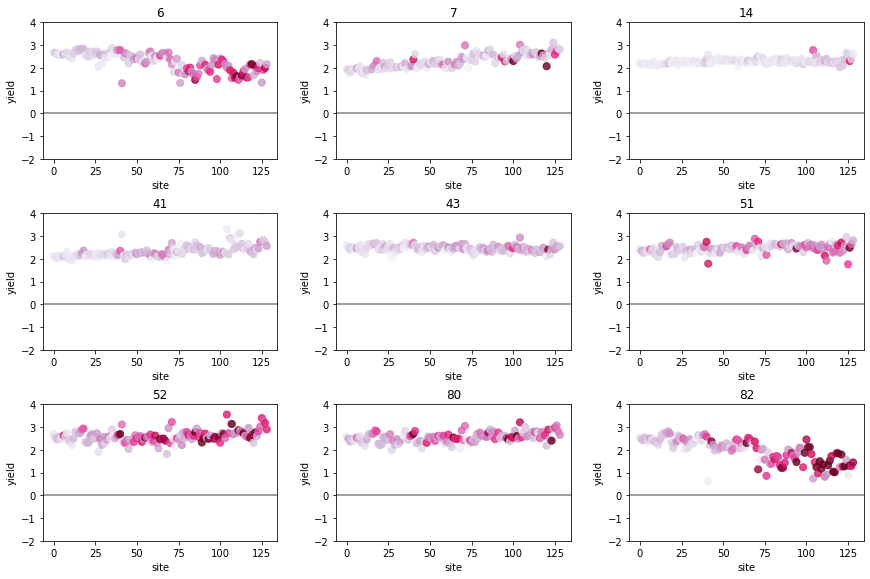

In [20]:
# highest-yielding cultivars
cultivars = [6,7,14,41,43,51,52,80,82]
sites = np.arange(129)

fig = plt.figure(figsize=(12,8))

for item, cvar in zip(np.arange(len(cultivars)), cultivars):
    ax = fig.add_subplot(3,3,item+1)
    ax.scatter(list(sites), mx_mean[cvar,:]/mx_mean.mean(axis=0), alpha=0.8, s=50,
               c=mx_variance[cvar,:]/mx_mean[cvar, :], cmap='PuRd', vmin=0, vmax=10)
    ax.set_ylim(-2, 4)
    ax.set_xlabel('site')
    ax.set_ylabel('yield')
    ax.axhline(0, color='grey')
    ax.set_title(cvar)

fig.subplots_adjust(left=0.05, bottom=0.05, right=1, top=0.95, wspace=0.25, hspace=0.4)
#plt.savefig('/home/disk/eos8/ach315/upscale/figs/scatter_relyield_var.png', format='png', dpi=800)

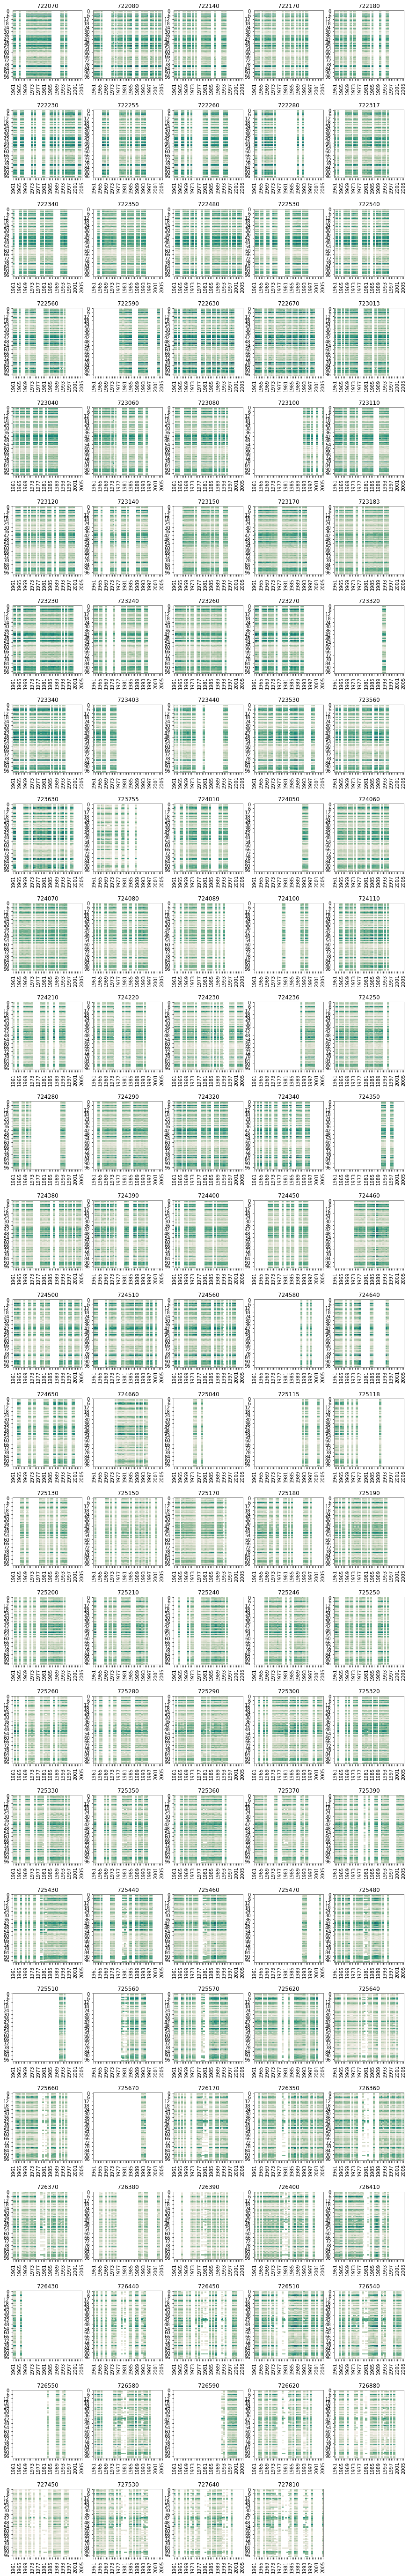

In [41]:
# all cultivars - all simulations
years = np.arange(1961, 2006)
cultivars = np.arange(100)
sites = df_sites.site[:-1]

df = df_all.groupby(['site', 'cvar', 'year']).mean()
start_year = 1961

# customize xtick labels
array_xticks = ['']*45
index_array = np.arange(0,45,4)
array_years = np.arange(1961,2006,4)
for index_a, index_y in zip(index_array, range(len(array_years))):
    array_xticks[index_a] = array_years[index_y]

# visualize
fig = plt.figure(figsize=(15,100))

for index, site in zip(range(len(sites)), sites):
    mx = np.empty(shape=(len(cultivars), len(years)))

    for cvar in cultivars:
        ear_years = np.empty(len(years))
        ear_years[:] = np.nan
        ears = df.loc[(site, cvar)].dm_ear
        index_years = df.loc[(site, cvar)].dm_ear.index - start_year
        ear_years[index_years] = ears
        mx[cvar] = ear_years
    
    ax = fig.add_subplot(26,5,index+1)
    hm = sns.heatmap(mx, cmap=Tempo_10.mpl_colormap, 
                     vmin=0, vmax=250, cbar=False,
                     xticklabels=array_xticks)
    hm.axhline(y = 0, color='grey',linewidth=2)
    hm.axhline(y = mx.shape[0], color='grey', linewidth=2)
    hm.axvline(x = 0, color='grey', linewidth=2)
    hm.axvline(x = mx.shape[1], color='grey', linewidth=2)
    hm.set_title(site)

fig.subplots_adjust(wspace=0.15, hspace=0.45)
#plt.savefig('/home/disk/eos8/ach315/upscale/figs/heatmap_year_cvar_yield.png', format='png', dpi=300)

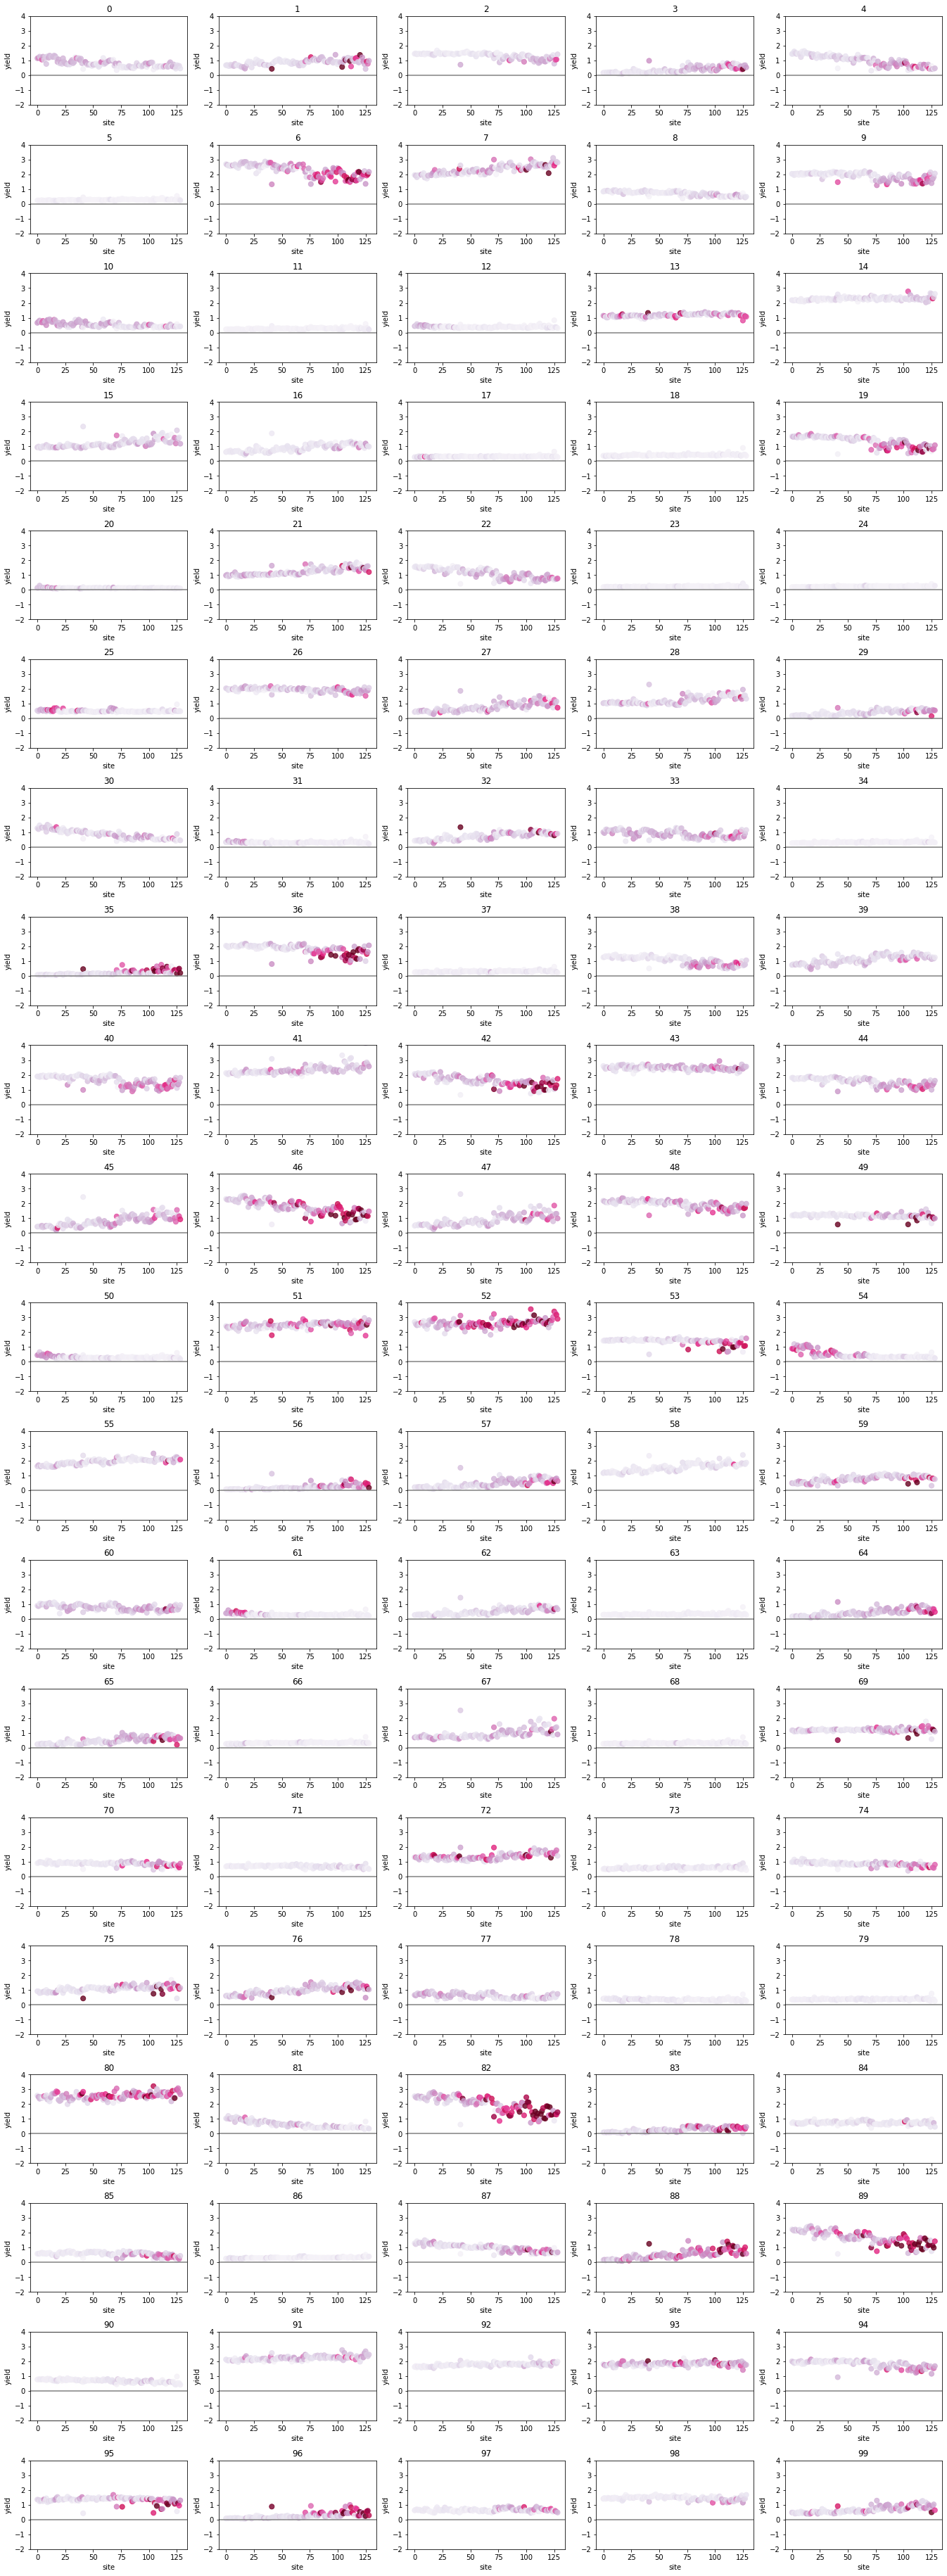

In [12]:
# all cultivars
cultivars = np.arange(100)
sites = np.arange(129)

fig = plt.figure(figsize=(20,50))
for cvar in cultivars:
    ax = fig.add_subplot(20, 5, cvar+1)
    ax.scatter(list(sites), mx_mean[cvar,:]/mx_mean.mean(axis=0), alpha=0.8, s=50,
               c=mx_variance[cvar,:]/mx_mean[cvar, :], cmap='PuRd', vmin=0, vmax=10)
    ax.set_ylim(-2, 4)
    ax.set_xlabel('site')
    ax.set_ylabel('yield')
    ax.axhline(0, color='grey')
    ax.set_title(cvar)
fig.subplots_adjust(left=0.05, bottom=0, right=0.95, top=1, wspace=0.2, hspace=0.45)